In [ ]:
'''
26种方法在10个下采样数据集上运行时间与内存占用折线图
'''

#### 运行效率（折线图）

In [7]:
import os, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [11]:
datapath = "/home/henu/work/result/efficiency/"
files = [
    os.path.join(datapath,"cell_100.csv"),
    os.path.join(datapath,"cell_500.csv"),
    os.path.join(datapath,"cell_1000.csv"),
    os.path.join(datapath,"cell_2000.csv"),
    os.path.join(datapath,"cell_5000.csv"),
    os.path.join(datapath,"cell_10000.csv"),
    os.path.join(datapath,"cell_20000.csv"),
    os.path.join(datapath,"cell_30000.csv"),
    os.path.join(datapath,"cell_50000.csv"),
    os.path.join(datapath,"cell_73233.csv"),
]
size_re = re.compile(r"cell_(\d+)\.csv$", re.IGNORECASE)

# 1) 读取成长表（dataset_size, method, memory, time）
rows = []
for fp in files:
    if not os.path.exists(fp):
        raise FileNotFoundError(f"Missing file: {fp}")
    m = size_re.search(os.path.basename(fp))
    size = int(m.group(1)) if m else None
    if size is None:
        continue

    df = pd.read_csv(fp)
    # 列名固定：Method, PeakMemory(gb), Time(s)
    need = ["Method", "PeakMemory(gb)", "Time(s)"]
    if not set(need).issubset(df.columns):
        raise ValueError(f"{fp} must contain columns: {need}")

    df = df[need].copy()
    df["Method"] = df["Method"].astype(str).str.strip()

    for _, r in df.iterrows():
        rows.append({
            "dataset_size": size,
            "method": r["Method"],
            "memory": float(r["PeakMemory(gb)"]),
            "time": float(r["Time(s)"]) / 3600.0,
        })

long_df = pd.DataFrame(rows)

# 2) 横轴规模（升序且为 float，与你原代码一致）
cell_counts = np.array(sorted(long_df["dataset_size"].unique()), dtype=float)

# 3) 方法列表（从数据中提取、按字母序稳定）
methods = sorted(long_df["method"].unique().tolist())

# 4) 构造 dict：方法 → 按 cell_counts 顺序排列的列表；缺失填 None
runtime_data, memory_data = {}, {}
for method in methods:
    sub = long_df[long_df["method"] == method]
    time_map = dict(zip(sub["dataset_size"], sub["time"]))
    mem_map  = dict(zip(sub["dataset_size"], sub["memory"]))
    runtime_data[method] = [time_map.get(int(s), None) for s in cell_counts]
    memory_data[method]  = [mem_map.get(int(s), None)  for s in cell_counts]


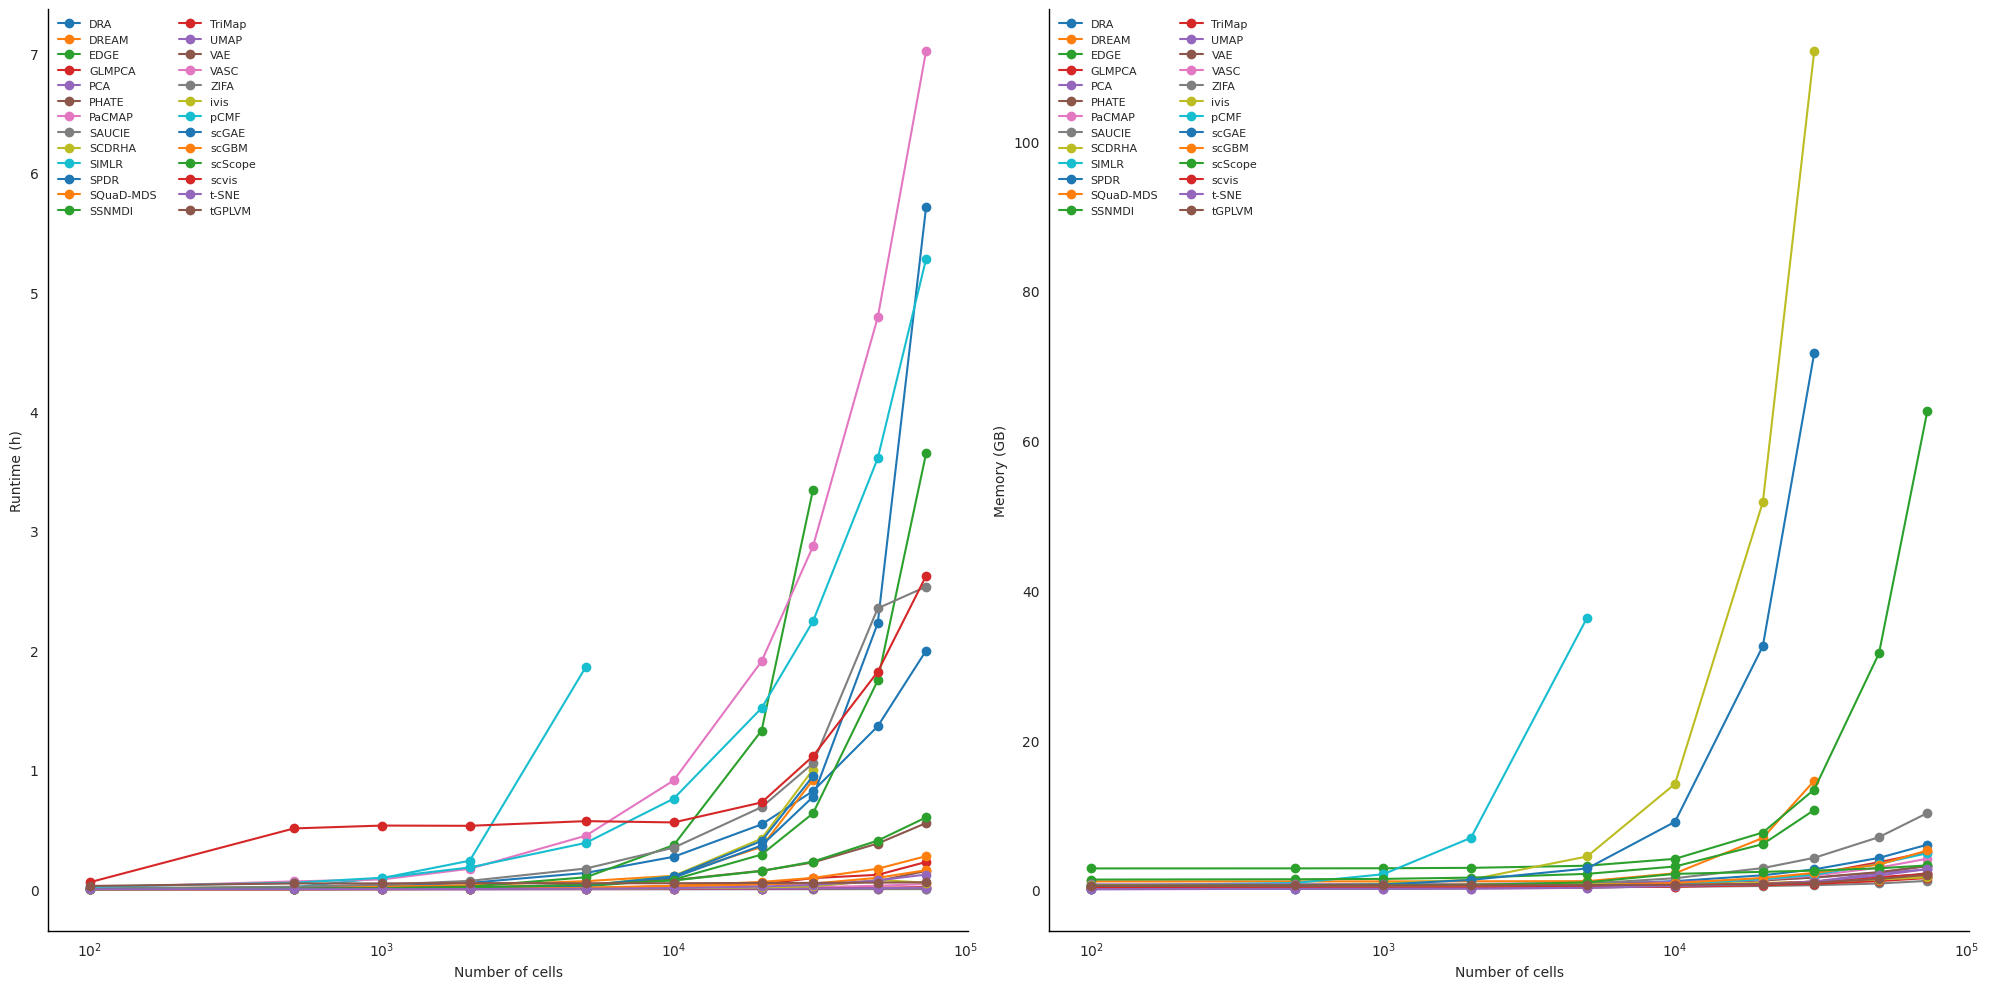

In [27]:
# 创建图形窗口
fig, axes = plt.subplots(1, 2, figsize=(20, 10),facecolor="white")

# 图A：运行时间
for method, color in zip(methods, colors):
    axes[0].plot(cell_counts, runtime_data[method], label=method, color=color, marker='o')
axes[0].set_xscale("log")  # 将x轴设为对数坐标  log10(cell number)
axes[0].set_yscale("linear")  # 将y轴设为对数坐标  log10(runtime)
# axes[0].set_title("Runtime vs Number of Cells")
axes[0].set_xlabel("Number of cells")
axes[0].set_ylabel("Runtime (h)")
axes[0].legend()
# axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)  # 网格线，注释掉这一行去掉网格线


# 图B：内存占用
for method, color in zip(methods, colors):
    axes[1].plot(cell_counts, memory_data[method], label=method, color=color, marker='o')
axes[1].set_xscale("log")
axes[1].set_yscale("linear")
# axes[1].set_title("Memory Usage vs Number of Cells")
axes[1].set_xlabel("Number of cells")
axes[1].set_ylabel("Memory (GB)")
axes[1].legend()
# axes[1].grid(True, which="both", linestyle="--", linewidth=0.5)

fig.patch.set_facecolor('white')  # matplotlib背景默认为灰色，改为白色
# 只取掉网格线，背后还是会存在线条，这段代码去除背景所有线条
for ax in axes:
    ax.set_facecolor('white')  # matplotlib背景默认为灰色，改为白色
    ax.grid(False) # 关闭 matplotlib grid

    # 显示 X 和 Y 轴的轴线（只显示左边和底部的轴线）
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_color("black")
    ax.spines['left'].set_color("black")

    ax.legend(loc="best", fontsize=8, frameon=False, ncol=2)
    # 显示 X 和 Y 轴的轴线 （方形框包裹图）
    # for spine in ax.spines.values():
    #     spine.set_visible(True)
    #     spine.set_linewidth(1)
    #     spine.set_color("black")

# 自动调整布局并保存为 SVG 矢量图
plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/legend.svg", format="svg",facecolor="white")
plt.savefig("/home/henu/work/result/figures/efficiency/legend.pdf", format="pdf",facecolor="white")
plt.show()

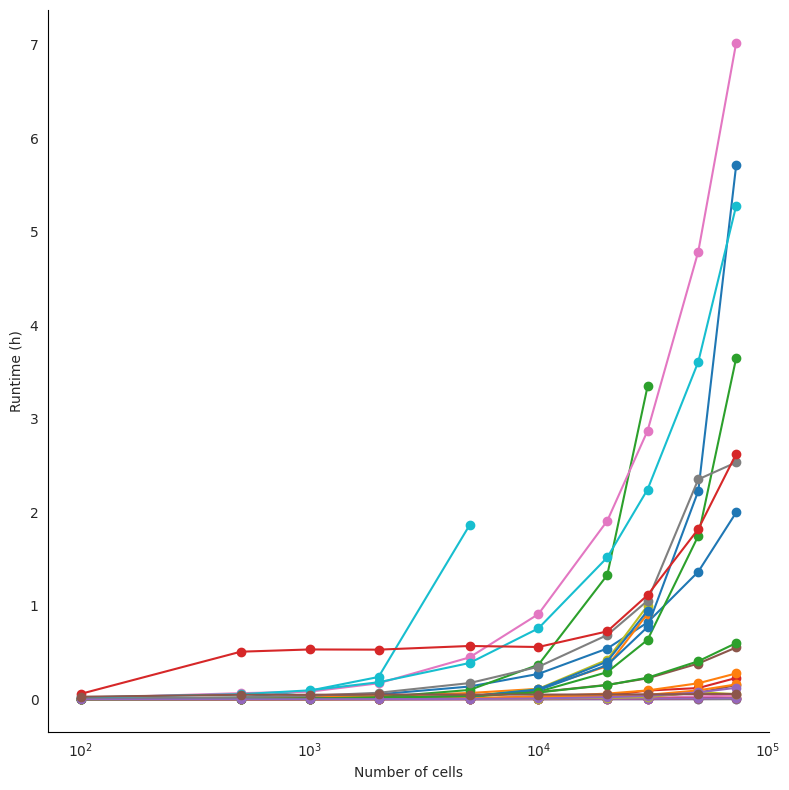

In [39]:
# 创建图形窗口
plt.figure(figsize=(8, 8),facecolor="white")
plt.gca().set_facecolor('white')

# 图A：运行时间
for method, color in zip(methods, colors):
    plt.plot(cell_counts, runtime_data[method], label=method, color=color, marker='o')
plt.xscale("log")  # 将x轴设为对数坐标  log10(cell number)
plt.yscale("linear")  # 将y轴设为对数坐标  log10(runtime)
plt.xlabel("Number of cells")
plt.ylabel("Runtime (h)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("black")
plt.gca().spines['bottom'].set_color("black")

# 自动调整布局并保存为 SVG 矢量图
plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/runtime_Non_legend.svg", format="svg",facecolor="white")
plt.savefig("/home/henu/work/result/figures/efficiency/runtime_Non_legend.pdf", format="pdf",facecolor="white")
plt.show()

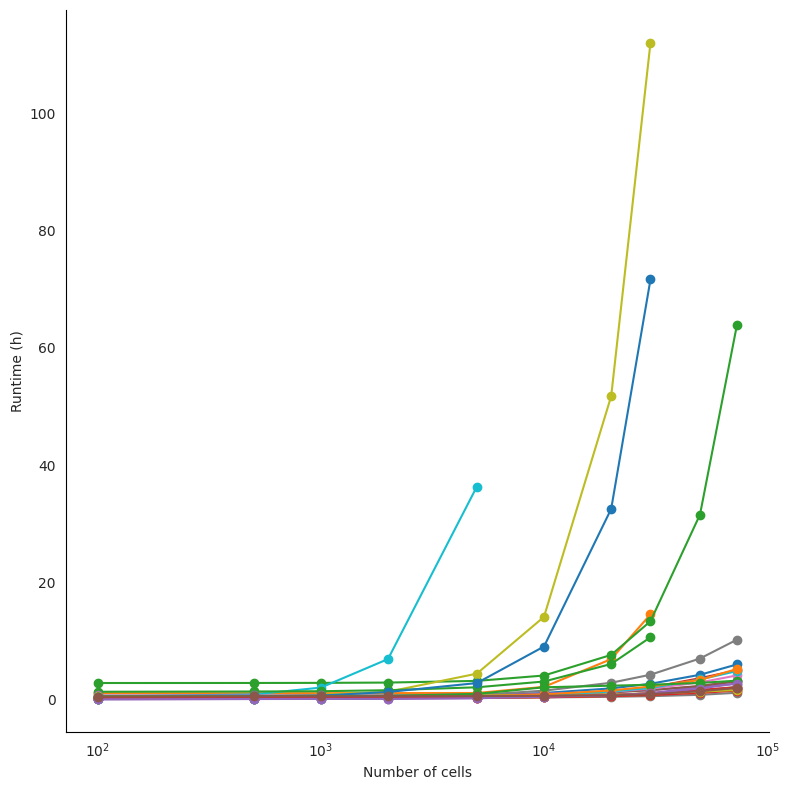

In [42]:
# 创建图形窗口
plt.figure(figsize=(8, 8),facecolor="white")
plt.gca().set_facecolor('white')

# 图B：内存占用
for method, color in zip(methods, colors):
    plt.plot(cell_counts, memory_data[method], label=method, color=color, marker='o')
plt.xscale("log")  # 将x轴设为对数坐标  log10(cell number)
plt.yscale("linear")  # 将y轴设为对数坐标  log10(runtime)
plt.xlabel("Number of cells")
plt.ylabel("Runtime (h)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("black")
plt.gca().spines['bottom'].set_color("black")

# 自动调整布局并保存为 SVG 矢量图
plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/memory_Non_legend.svg", format="svg",facecolor="white")
plt.savefig("/home/henu/work/result/figures/efficiency/memory_Non_legend.pdf", format="pdf",facecolor="white")
plt.show()

In [6]:
import matplotlib.pyplot as plt

# Tableau 20 颜色（再附加几种额外颜色补齐 26 种）
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#393b79", "#637939", "#8c6d31", "#843c39", "#7b4173",
    "#3182bd", "#31a354", "#756bb1", "#636363", "#e6550d",
    "#9c9ede", "#cedb9c", "#e7ba52", "#ad494a", "#de9ed6", "#9edae5"
]

In [8]:
from matplotlib import cm
import numpy as np

# 从 ColorBrewer 中取 12 种 Paired + 12 种 Set3
paired = plt.cm.get_cmap("Paired", 12).colors
set3 = plt.cm.get_cmap("Set3", 12).colors
colors = np.vstack([paired, set3])[:26]

/tmp/ipykernel_168920/1064998255.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  paired = plt.cm.get_cmap("Paired", 12).colors
/tmp/ipykernel_168920/1064998255.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  set3 = plt.cm.get_cmap("Set3", 12).colors


In [4]:
import numpy as np
from matplotlib import cm

cmap = cm.get_cmap("cubehelix", 26)  # 或 "viridis_r"
colors = [cmap(i) for i in range(26)]

/tmp/ipykernel_324402/240553717.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("cubehelix", 26)  # 或 "viridis_r"


In [19]:
import matplotlib.pyplot as plt

colors = [
    "#1f77b4", "#ff7f0e", "#d62728", "#9467bd", "#8c564b", "#e377c2",
    "#7f7f7f", "#bcbd22", "#17becf", "#2ca02c",
    "#393b79", "#e6550d", "#8c6d31", "#843c39", "#7b4173",
    "#3182bd", "#ff9896", "#c49c94", "#98df8a", "#9edae5",
    "#dbdb8d", "#17becf", "#c5b0d5", "#f7b6d2", "#bcbd22", "#aec7e8"
]

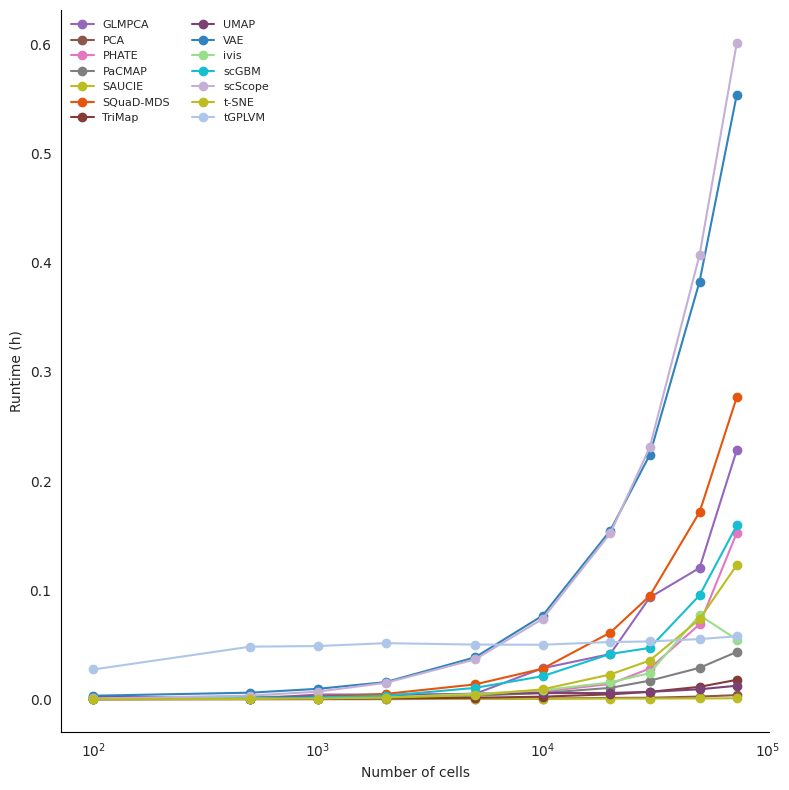

In [16]:
# 锁定“方法→颜色”映射（基于未过滤前的 methods 顺序）
method_to_color = {m: colors[i % len(colors)] for i, m in enumerate(methods)}

# 找到73233对应的索引，并筛除在该数据集上运行时间>1小时的方法
target_size = 73233
exclude_methods = set()
if float(target_size) in cell_counts:
    target_idx = int(np.where(cell_counts == float(target_size))[0][0])
    for m in methods:
        t = runtime_data[m][target_idx]
        if (t is None) or (isinstance(t, float) and not np.isfinite(t) or (t > 1.0)):
            exclude_methods.add(m)
else:
    print("Warning: dataset size 73233 not found in cell_counts; no filtering applied.")

# —— 绘图部分 ——（仅在循环内跳过被过滤的方法，颜色使用锁定映射）
plt.figure(figsize=(8, 8), facecolor="white")
plt.gca().set_facecolor('white')

for m in methods:
    if m in exclude_methods:
        continue
    plt.plot(cell_counts, runtime_data[m], label=m,
             color=method_to_color[m], marker='o')

plt.xscale("log")
plt.yscale("linear")
plt.xlabel("Number of cells")
plt.ylabel("Runtime (h)")
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("black")
ax.spines['bottom'].set_color("black")
ax.legend(loc="best", fontsize=8, frameon=False, ncol=2)

plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/2/runtime_legend5.svg",
            format="svg", facecolor="white")
# plt.savefig("/home/henu/work/result/figures/efficiency/1/runtime_legend4.pdf",
#             format="pdf", facecolor="white")
plt.show()

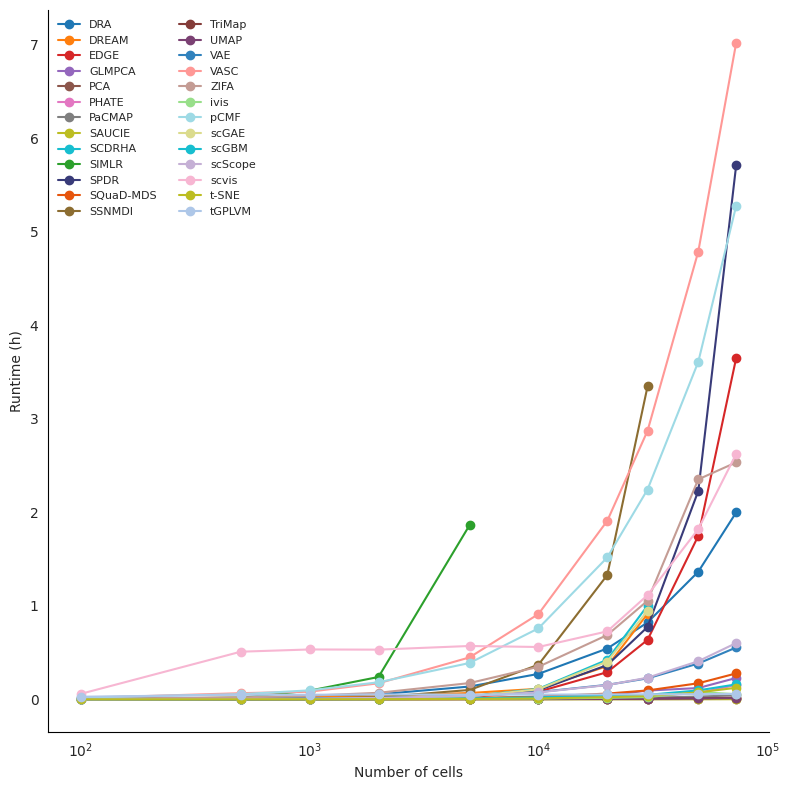

In [12]:
# 创建图形窗口
plt.figure(figsize=(8, 8),facecolor="white")
plt.gca().set_facecolor('white')

# 图A：运行时间
for method, color in zip(methods, colors):
    plt.plot(cell_counts, runtime_data[method], label=method, color=color, marker='o')
plt.xscale("log")  # 将x轴设为对数坐标  log10(cell number)
plt.yscale("linear")  # 将y轴设为对数坐标  log10(runtime)
plt.xlabel("Number of cells")
plt.ylabel("Runtime (h)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("black")
plt.gca().spines['bottom'].set_color("black")
plt.gca().legend(loc="best", fontsize=8, frameon=False, ncol=2)
# plt.gca().legend(loc="center left", bbox_to_anchor=(1.02,0.5), frameon=False)

# 自动调整布局并保存为 SVG 矢量图
plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/2/runtime_legend5.svg", format="svg",facecolor="white")
# plt.savefig("/home/henu/work/result/figures/efficiency/1/runtime_legend4.pdf", format="pdf",facecolor="white")
plt.show()

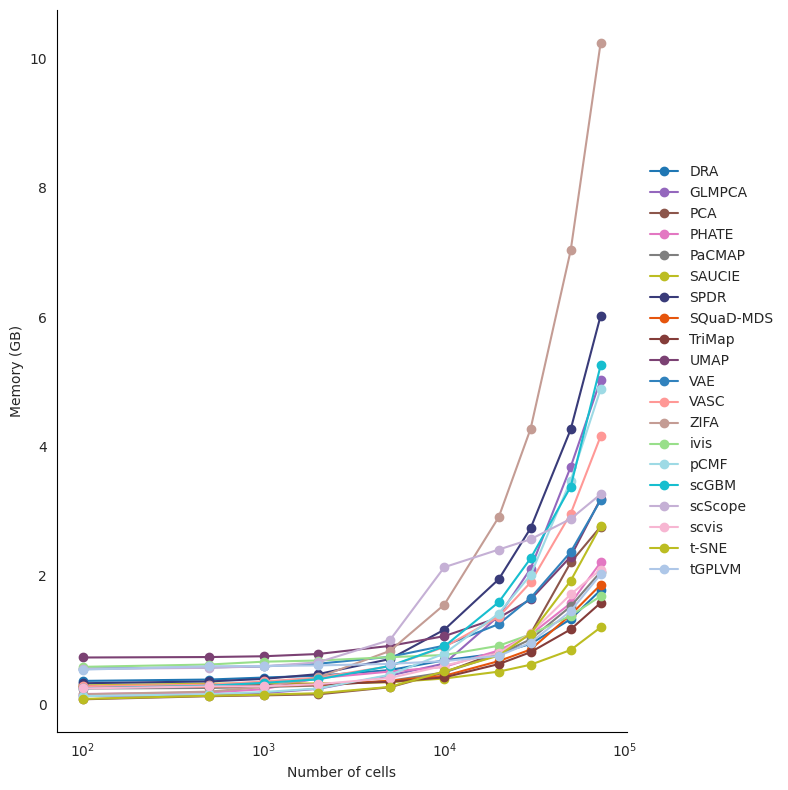

In [20]:
# 若你之前已定义了 method_to_color，就直接复用；否则按原始 methods 顺序锁定一次映射
if 'method_to_color' not in locals():
    method_to_color = {m: colors[i % len(colors)] for i, m in enumerate(methods)}

# —— 基于 73233 数据点的过滤（内存 > 15GB 或无数据/NaN）——
target_size = 73233
exclude_methods_mem = set()
if float(target_size) in cell_counts:
    target_idx = int(np.where(cell_counts == float(target_size))[0][0])
    for m in methods:
        mem = memory_data[m][target_idx]
        # 过滤条件：None 或 NaN/inf，或 > 15
        if (mem is None) or (isinstance(mem, float) and not np.isfinite(mem)) or (mem > 15.0):
            exclude_methods_mem.add(m)
else:
    print("Warning: dataset size 73233 not found in cell_counts; no memory filtering applied.")

# 创建图形窗口
plt.figure(figsize=(8, 8), facecolor="white")
plt.gca().set_facecolor('white')

# 图B：内存占用（仅绘制未被排除的方法；颜色使用锁定映射）
for m in methods:
    if m in exclude_methods_mem:
        continue
    plt.plot(cell_counts, memory_data[m], label=m,
             color=method_to_color[m], marker='o')

plt.xscale("log")   # x 轴对数
plt.yscale("linear")
plt.xlabel("Number of cells")
plt.ylabel("Memory (GB)")
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("black")
ax.spines['bottom'].set_color("black")
# ax.legend(loc="best", fontsize=8, frameon=False, ncol=2)
ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/2/memory_legend.svg", format="svg", facecolor="white")
# plt.savefig("/home/henu/work/result/figures/efficiency/1/memory_legend.pdf", format="pdf", facecolor="white")
plt.show()

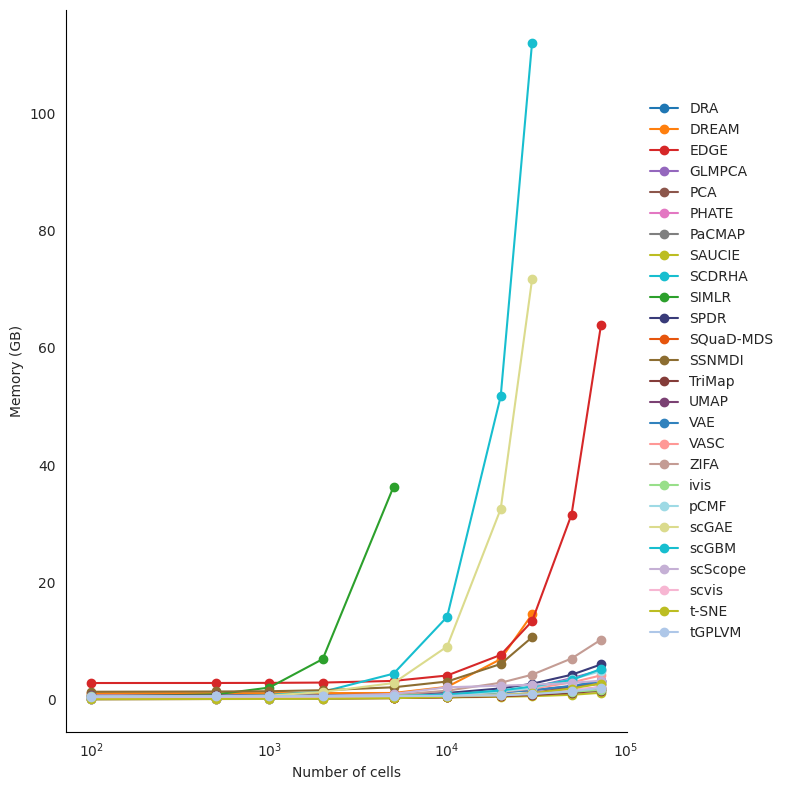

In [15]:
# 创建图形窗口
plt.figure(figsize=(8, 8),facecolor="white")
plt.gca().set_facecolor('white')

# 图B：内存占用
for method, color in zip(methods, colors):
    plt.plot(cell_counts, memory_data[method], label=method, color=color, marker='o')
plt.xscale("log")  # 将x轴设为对数坐标  log10(cell number)
plt.yscale("linear")  # 将y轴设为对数坐标  log10(runtime)
plt.xlabel("Number of cells")
plt.ylabel("Memory (GB)")
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color("black")
plt.gca().spines['bottom'].set_color("black")
# plt.gca().legend(loc="best", fontsize=8, frameon=False, ncol=2)
plt.gca().legend(loc="center left", bbox_to_anchor=(1.02,0.5), frameon=False)

# 自动调整布局并保存为 SVG 矢量图
plt.tight_layout()
plt.savefig("/home/henu/work/result/figures/efficiency/1/memory_legend.svg", format="svg",facecolor="white")
plt.savefig("/home/henu/work/result/figures/efficiency/1/memory_legend.pdf", format="pdf",facecolor="white")
plt.show()